In [1]:
import hypernetx as hnx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import hypernetx.algorithms.contagion as contagion

## Create a hypergraph

In [2]:
n = 1000
m = 10000

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList, static=False)

## Initialize simulation variables
- $\tau$ is a dictionary of the infection rate for each hyperedge size
- $\gamma$ is the healing rate
- $t_{max}$ is the time at which to terminate the simulation if it hasn't already
- $\Delta t$ is the time step size to use for the discrete time algorithm

In [3]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 0.1

## Run the SIR epidemic simulations
- The discrete SIR takes fixed steps in time and multiple infection/healing events can happen at each time step.
- The Gillespie SIR algorithm takes steps in time exponentially distributed and at each step forward, a single event occurs
- As $\Delta t\to 0$, the discrete time algorithm converges to the Gillespie algorithm. 

In [4]:
start = time.time()
t1, S1, I1, R1 = contagion.discrete_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2, R2 = contagion.Gillespie_SIR(H, tau, gamma, rho=0.1, tmin=0, tmax=tmax)
print(time.time() - start)

10.176109790802002
0.14586710929870605


## Plot of the results
- Dashed lines are the results from the discrete time algorithm
- Solid lines are the results from the Gillespie algorithm
- Plots of the numbers susceptible, infected, and recovered over time

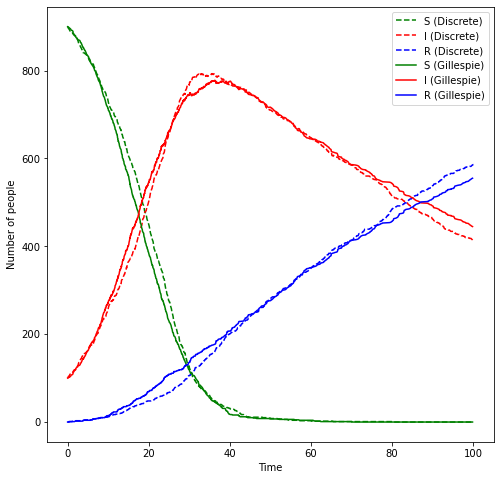

In [5]:
plt.figure()
plt.plot(t1, S1, 'g--', label='S (Discrete)')
plt.plot(t1, I1, 'r--', label='I (Discrete)')
plt.plot(t1, R1, 'b--', label='R (Discrete)')
plt.plot(t2, S2, 'g-', label='S (Gillespie)')
plt.plot(t2, I2, 'r-', label='I (Gillespie)')
plt.plot(t2, R2, 'b-', label='R (Gillespie)')
plt.xlabel("Time")
plt.ylabel("Number of people")
plt.legend()
plt.show()

## SIS Model
In this model, once individuals heal, they may become re-infected.

## Epidemic parameters

In [13]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
tmax = 100
dt = 1

In [10]:
tau = {2:0.01, 3:0.01}
gamma = 0.01
start = time.time()
t1, S1, I1 = contagion.discrete_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax, dt=dt)
print(time.time() - start)

start = time.time()
t2, S2, I2 = contagion.Gillespie_SIS(H, tau, gamma, rho = 0.1, tmin = 0, tmax=tmax)
print(time.time() - start)

1.083643913269043
0.2232968807220459


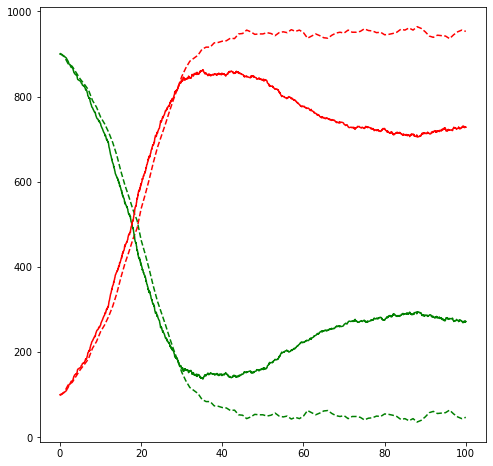

In [11]:
plt.figure()
plt.plot(t1, S1, 'g--')
plt.plot(t1, I1, 'r--')
plt.plot(t2, S2, 'g-')
plt.plot(t2, I2, 'r-')

plt.show()

## Animation of SIS model

In [1]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import random
import time
import hypernetx.algorithms.contagion as contagion
import numpy as np
from IPython.display import HTML

In [8]:
n = 100
m = 40

hyperedgeList = [random.sample(range(n), k=random.choice([2,3])) for i in range(m)]
H = hnx.Hypergraph(hyperedgeList)
H = H.collapse_edges()

In [9]:
tau = {2:2, 3:1}
gamma = 0.1

In [10]:
transition_events = contagion.discrete_SIR(H, tau, gamma, rho=0.2, tmin=0, tmax=50, dt=1, return_full_data=True)

In [11]:
transition_events

{0: [('I', 34, None),
  ('I', 85, None),
  ('I', 69, None),
  ('I', 13, None),
  ('I', 90, None),
  ('I', 63, None),
  ('I', 47, None),
  ('I', 42, None),
  ('I', 73, None),
  ('I', 2, None),
  ('I', 31, None),
  ('I', 87, None),
  ('I', 68, None)],
 1: [('I', 74, '22:1'),
  ('I', 86, '8:1'),
  ('I', 15, '11:1'),
  ('I', 14, '33:1'),
  ('I', 64, '29:1'),
  ('R', 47),
  ('I', 97, '37:1')],
 2: [('I', 32, '5:1'),
  ('R', 68),
  ('I', 58, '15:1'),
  ('I', 12, '16:1'),
  ('R', 90),
  ('I', 37, '19:1'),
  ('R', 13),
  ('I', 99, '39:1')],
 3: [('I', 19, '36:1'),
  ('I', 36, '1:1'),
  ('R', 86),
  ('R', 58),
  ('R', 34),
  ('I', 60, '38:1')],
 4: [('I', 22, '14:1'), ('R', 31)],
 5: [('R', 87), ('R', 15), ('R', 60)],
 6: [],
 7: [('R', 36), ('R', 37)],
 8: [('R', 12)],
 9: [('R', 73)],
 10: [('R', 99)],
 11: [('R', 2), ('R', 22)],
 12: [],
 13: [('R', 42)],
 14: [],
 15: [],
 16: [('R', 14), ('R', 63)],
 17: [],
 18: [],
 19: [('R', 32)],
 20: [],
 21: [('R', 74)],
 22: [],
 23: [],
 24: [('R'

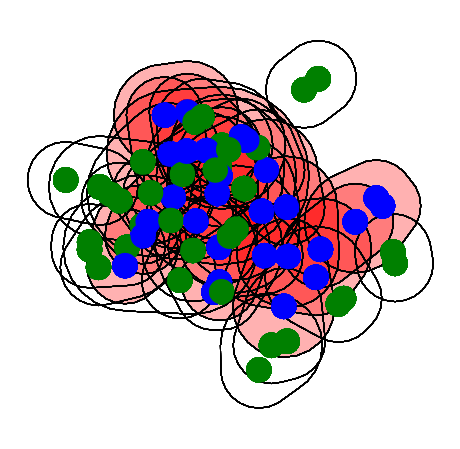

In [12]:
node_state_color_dict = {"S":"green", "I":"red", "R":"blue"}
edge_state_color_dict = {"S":(0, 1, 0, 0.3), "I":(1, 0, 0, 0.3), "R":(0, 0, 1, 0.3), "OFF": (1, 1, 1, 0)}

fps = 1

fig = plt.figure()
animation = contagion.contagion_animation(fig, H, transition_events, node_state_color_dict, edge_state_color_dict, node_radius=3, fps=fps)

In [13]:
HTML(animation.to_jshtml())